In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile
local_zip = '/content/Brain tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [ ]:
base_dir = '/content/data/Brain tumor'
training_dir = os.path.join(base_dir, 'Training')
testing_dir = os.path.join(base_dir, 'Testing')
pituitary_train = os.path.join(training_dir,'pituitary')
notumor_train = os.path.join(training_dir,'notumor')
meningioma_train = os.path.join(training_dir,'meningioma')
glioma_train = os.path.join(training_dir,'glioma')

In [ ]:
print('total training pituitary images:', len(os.listdir(pituitary_train)))
print('total training notumor images:', len(os.listdir(notumor_train)))
print('total training meningioma images:', len(os.listdir(meningioma_train)))
print('total training glioma images', len(os.listdir(glioma_train)))

total training pituitary images: 1457
total training notumor images: 1595
total training meningioma images: 1339
total training glioma images 1321


In [ ]:
model = tf.keras.Sequential([
    #first convolution layer
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (64,64,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    #second convolution layer
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third convolution layer
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth convolution layer
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed to a DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    # add a dropout rate 0.2
    tf.keras.layers.Dropout(0.2),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    #add a dropout rate 0.2
    tf.keras.layers.Dropout(0.2),
    #add a final softmax layer for classification
    tf.keras.layers.Dense(4, activation = 'softmax')
    
])

In [ ]:
TRAINING_DIR = training_dir
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')
VALIDATION_DIR = testing_dir
validation_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size = (64,64),
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   color_mode = 'grayscale')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size = (64,64),
                                                             batch_size = 32,
                                                             class_mode = 'categorical',
                                                             color_mode = 'grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### checking the parameters of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

### compiling the model

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### training the  model

In [ ]:
history = model.fit(train_generator,
                             steps_per_epoch = 5712//32,
                             epochs = 200,
                             validation_data = validation_generator,
                             validation_steps = 1311//32,
                             verbose = 2 )

Epoch 1/200
89/89 - 22s - loss: 1.1754 - accuracy: 0.4492 - val_loss: 1.7204 - val_accuracy: 0.3781 - 22s/epoch - 246ms/step
Epoch 2/200
89/89 - 12s - loss: 0.9852 - accuracy: 0.5855 - val_loss: 1.5769 - val_accuracy: 0.4328 - 12s/epoch - 132ms/step
Epoch 3/200
89/89 - 11s - loss: 0.9338 - accuracy: 0.6126 - val_loss: 2.1373 - val_accuracy: 0.3828 - 11s/epoch - 119ms/step
Epoch 4/200
89/89 - 12s - loss: 0.8625 - accuracy: 0.6585 - val_loss: 1.8140 - val_accuracy: 0.4125 - 12s/epoch - 131ms/step
Epoch 5/200
89/89 - 11s - loss: 0.7640 - accuracy: 0.6917 - val_loss: 2.9990 - val_accuracy: 0.3719 - 11s/epoch - 119ms/step
Epoch 6/200
89/89 - 11s - loss: 0.7522 - accuracy: 0.6942 - val_loss: 1.4213 - val_accuracy: 0.5422 - 11s/epoch - 119ms/step
Epoch 7/200
89/89 - 11s - loss: 0.7316 - accuracy: 0.7082 - val_loss: 1.8658 - val_accuracy: 0.4156 - 11s/epoch - 119ms/step
Epoch 8/200
89/89 - 11s - loss: 0.6687 - accuracy: 0.7353 - val_loss: 1.9438 - val_accuracy: 0.5109 - 11s/epoch - 120ms/step


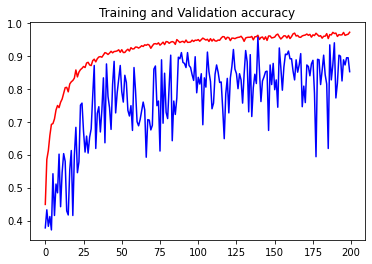

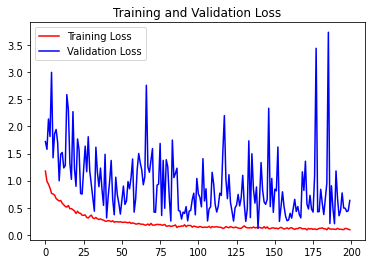

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc= 0)

plt.show()